![title](Capture.PNG)

<h1>Author: Achal Mate</h1>

<h1>Task : = Prediction using Supervised ML</h1>

<h2>Objectives</h2><h3>
● Predict the percentage of an student based on the no. of study hours.<br>

● What will be predicted score if a student studies for 9.25 hrs/ day?<br>


<h3> Import all Necessary Library</h3>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from scipy import stats

<h3>Import the DataSet</h3>

In [2]:
student_data = pd.read_csv("student_scores.csv.txt")

<h3>View The Data From Data Set</h3>

In [3]:
student_data.head(10) #first 10 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h3>Dimensions of the Dataset</h3>

In [4]:
student_data.shape

(25, 2)

<h3>Concise Summary</h3>

In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h3>Statistical Summary</h3>

In [6]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h3>Data Visualization</h3>

Text(0, 0.5, 'Percentage Scored')

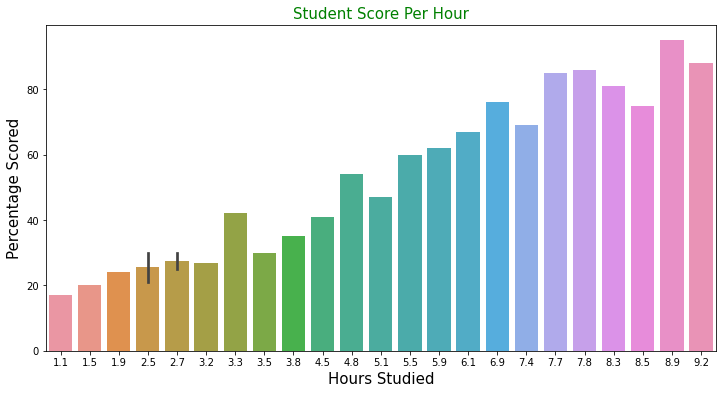

In [7]:
plt.figure(figsize=(12,6))
fig1 =sns.barplot(data = student_data,x = "Hours", y="Scores")
fig1.set_title("Student Score Per Hour",fontsize = 15,color='green')
fig1.set_xlabel("Hours Studied", fontsize = 15)
fig1.set_ylabel("Percentage Scored", fontsize = 15)



<h4>To Find the Relation between Score and Hours</h4>

Text(0.5, 1.0, 'Hours Vs Scores')

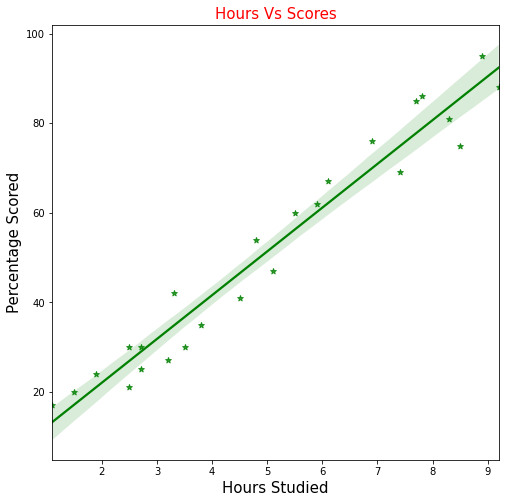

In [8]:
plt.figure(figsize=(8,8))
fig2 = sns.regplot(x="Hours",y="Scores",data= student_data,color='green',marker='*')
fig2.set_xlabel("Hours Studied", fontsize = 15)
fig2.set_ylabel("Percentage Scored", fontsize = 15)
fig2.set_title("Hours Vs Scores",fontsize = 15,color='red')

<h4>From the above graph ,we can clearly see that there is a positive linear relation between the number of hours and studied and percentage of score</h4>

<AxesSubplot:ylabel='Scores'>

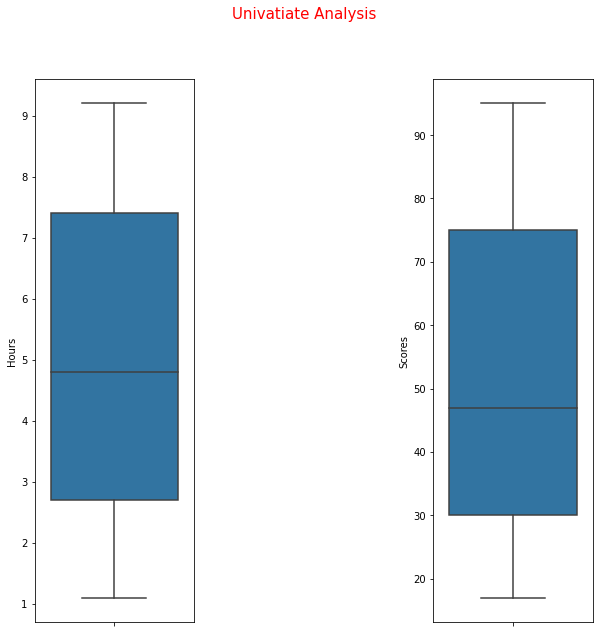

In [9]:
#univatiate analysis along with boxplot to check outliers

plt.figure(figsize=(10,10))
plt.suptitle("Univatiate Analysis",fontsize = 15,color='red')
plt.subplot(1,2,1)
plt.subplots_adjust(left = 0.125,wspace=1.5,hspace=1.5)
sns.boxplot(y=student_data["Hours"])

plt.subplot(1,2,2)
plt.subplots_adjust(left = 0.125,wspace=1.5,hspace=1.5)
sns.boxplot(y=student_data["Scores"])

<h4>There does not seem any outlier in the data</h4>

<h3>Preparing  The Data</h3>

In [10]:
train,test = train_test_split(student_data,test_size=0.25,random_state=123)

In [11]:
train.shape

(18, 2)

In [12]:
test.shape

(7, 2)

In [13]:
train_x = train.drop("Scores",axis = 1)
train_y = train["Scores"]

In [14]:
test_x = test.drop("Scores",axis = 1)
test_y = test["Scores"]

<h3>Training The Algorithm</h3>

In [15]:
linearRegression = LinearRegression()
linearRegression.fit(train_x,train_y)
print("Training Complete")

Training Complete


In [16]:
linearRegression.coef_

array([9.61718609])

In [17]:
linearRegression.intercept_

2.448617866650636

<h3>Making Predictions</h3>

<h4>Now We have train the algorithm ,its time to make predicition</h4>

In [18]:
predicitions = linearRegression.predict(test_x)#training data in hours

In [19]:
#comparing Predicted Data With Actual Data
df = pd.DataFrame({"Actual Data":test_y,"Predicted Data":predicitions})
df


,Actual Data,Predicted Data
5,20,16.874397
21,54,48.611111
22,35,38.993925
18,67,61.113453
15,95,88.041574
8,81,82.271262
7,60,55.343141


<h3>Barplot for Difference Between Actual Data and Predicted Value</h3>

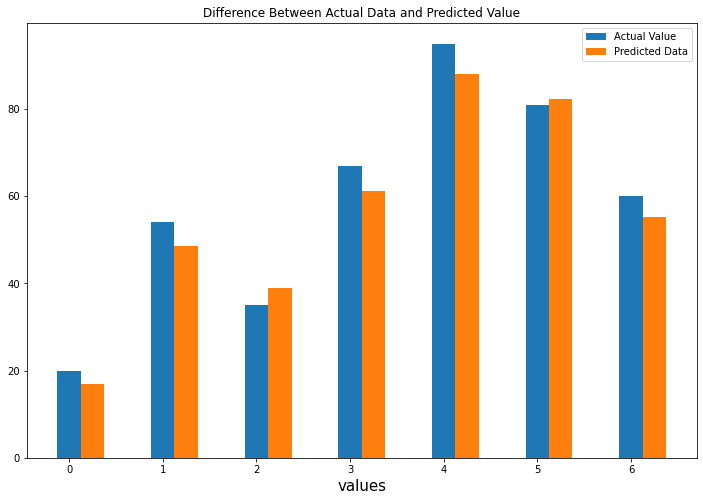

In [20]:
barWidth = 0.25
fig = plt.subplots(figsize = (12,8))

#set position of bar on X axis
bar1 = np.arange(len(test_y)) 
bar2 = [x + barWidth for x in bar1]

#make the plot
plt.bar(bar1,test_y,width=barWidth,label = "Actual Value")
plt.bar(bar2,predicitions,width=barWidth,label = "Predicted Data")

#Adding Xticks
plt.xlabel('Actual and Predicted data',fontsize = 15)
plt.xlabel('values',fontsize = 15)
plt.title("Difference Between Actual Data and Predicted Value")
plt.legend()

<h3>Evaluating The  Model</h3>

<h4>This is the final step is to evaluate the performance of algorithm.This step is particulary important to compare how well different algorithms perform on a particular dataset.<br><br>
Will I have chooses root  mean square method to evaluate the performance of algorithm.There are many other metrics available aslo</h4>


In [21]:
print("Mean Absolute Error:",metrics.mean_absolute_error(test_y,predicitions))

Mean Absolute Error: 4.468787262698274


In [22]:
print("Mean Square Error:",metrics.mean_squared_error(test_y,predicitions,squared=True))

Mean Square Error: 23.019217337139764


In [23]:
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(test_y,predicitions)))

Root Mean Square Error: 4.797834650875306


In [24]:

slope,inter,r,p,std, = stats.linregress(test_y,predicitions)

In [25]:
print('R-Squared value :',r)

R-Squared value : 0.9879117771947881


<h3>Here R-Squared value = 0.9879117771947881 means the model explain 98.79% of variability in the dependent variable (Score) by Independent variable(Hours)</h3

<h1><center>Thank You</center></h1>